In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"D:\DATA SCIENCE AND DATA ANALITICS\earthquake_data_tsunami.csv")
df

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,1
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,0
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,1
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,1
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,7.7,0,8,912,427,0.000,0.0,60.000,13.0490,-88.660,2001,1,0
778,6.9,5,7,745,0,0.000,0.0,36.400,56.7744,-153.281,2001,1,0
779,7.1,0,7,776,372,0.000,0.0,103.000,-14.9280,167.170,2001,1,0
780,6.8,0,5,711,64,0.000,0.0,33.000,6.6310,126.899,2001,1,0


In [6]:
df.describe()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,6.941125,4.333760,5.964194,870.108696,230.250639,1.325757,25.038990,75.883199,3.538100,52.609199,2012.280051,6.563939,0.388747
std,0.445514,3.169939,1.462724,322.465367,250.188177,2.218805,24.225067,137.277078,27.303429,117.898886,6.099439,3.507866,0.487778
min,6.500000,0.000000,1.000000,650.000000,0.000000,0.000000,0.000000,2.700000,-61.848400,-179.968000,2001.000000,1.000000,0.000000
25%,6.600000,0.000000,5.000000,691.000000,0.000000,0.000000,14.625000,14.000000,-14.595600,-71.668050,2007.000000,3.250000,0.000000
50%,6.800000,5.000000,6.000000,754.000000,140.000000,0.000000,20.000000,26.295000,-2.572500,109.426000,2013.000000,7.000000,0.000000
75%,7.100000,7.000000,7.000000,909.750000,445.000000,1.863000,30.000000,49.750000,24.654500,148.941000,2017.000000,10.000000,1.000000
max,9.100000,9.000000,9.000000,2910.000000,934.000000,17.654000,239.000000,670.810000,71.631200,179.662000,2022.000000,12.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  782 non-null    float64
 1   cdi        782 non-null    int64  
 2   mmi        782 non-null    int64  
 3   sig        782 non-null    int64  
 4   nst        782 non-null    int64  
 5   dmin       782 non-null    float64
 6   gap        782 non-null    float64
 7   depth      782 non-null    float64
 8   latitude   782 non-null    float64
 9   longitude  782 non-null    float64
 10  Year       782 non-null    int64  
 11  Month      782 non-null    int64  
 12  tsunami    782 non-null    int64  
dtypes: float64(6), int64(7)
memory usage: 79.6 KB


In [8]:
df.head()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,1
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,0
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,1
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,1
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,1


In [11]:
df.columns

Index(['magnitude', 'cdi', 'mmi', 'sig', 'nst', 'dmin', 'gap', 'depth',
       'latitude', 'longitude', 'Year', 'Month', 'tsunami'],
      dtype='object')

# 1)
Time-Based Analysis
* Explore how earthquake occurrences and tsunami events have changed over the 22-year period (2001–2022).:

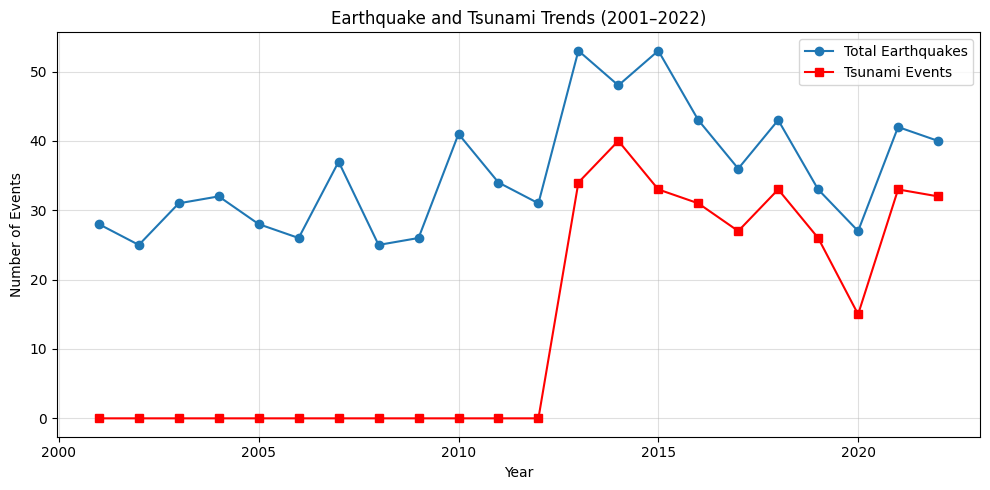

In [13]:

yearly = df.groupby("Year")[["tsunami"]].agg(
    earthquakes=("tsunami", "size"), tsunamis=("tsunami", "sum")
).reset_index()

plt.figure(figsize=(10,5))
plt.plot(yearly["Year"], yearly["earthquakes"], 'o-', label="Total Earthquakes")
plt.plot(yearly["Year"], yearly["tsunamis"], 's-r', label="Tsunami Events")
plt.title("Earthquake and Tsunami Trends (2001–2022)")
plt.xlabel("Year"); plt.ylabel("Number of Events")
plt.legend(); plt.grid(alpha=0.4); plt.tight_layout()
plt.show()

* Identify any trends in the frequency or magnitude of earthquakes over time

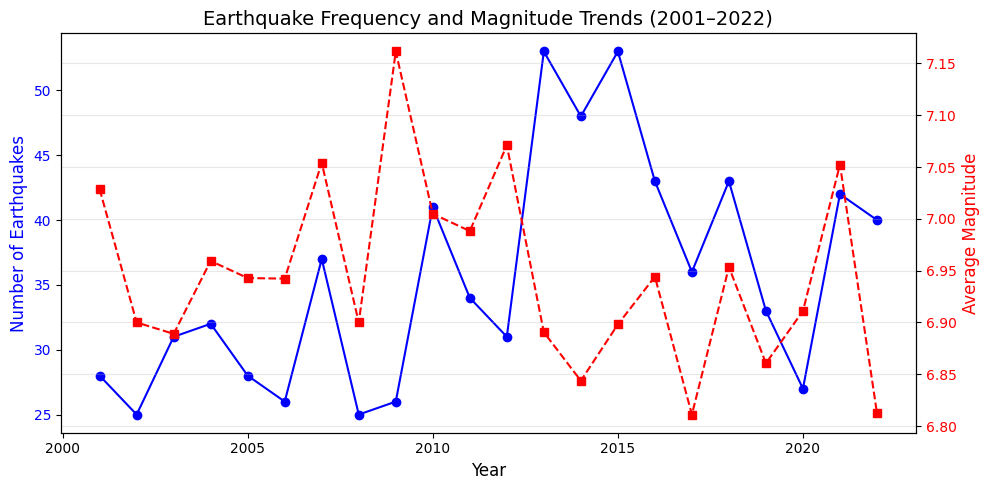

In [14]:

# Group by year to get total earthquakes and average magnitude
trend_df = df.groupby("Year").agg(
    earthquakes=("Year", "count"),
    avg_magnitude=("magnitude", "mean")
).reset_index()

# Plot trends
fig, ax1 = plt.subplots(figsize=(10, 5))

# Left y-axis: Earthquake frequency
ax1.plot(trend_df["Year"], trend_df["earthquakes"], 'o-', color='blue', label="Total Earthquakes")
ax1.set_xlabel("Year", fontsize=12)
ax1.set_ylabel("Number of Earthquakes", color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')

# Right y-axis: Average magnitude
ax2 = ax1.twinx()
ax2.plot(trend_df["Year"], trend_df["avg_magnitude"], 's--', color='red', label="Average Magnitude")
ax2.set_ylabel("Average Magnitude", color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')

# Title, grid, and layout
plt.title("Earthquake Frequency and Magnitude Trends (2001–2022)", fontsize=14)
fig.tight_layout()
plt.grid(alpha=0.3)
plt.show()


* 2.
Magnitude and Depth Analysis
* Analyze the distribution of earthquake magnitudes and depths.hs.

C:\Users\cs911\Downloads\Data Science\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


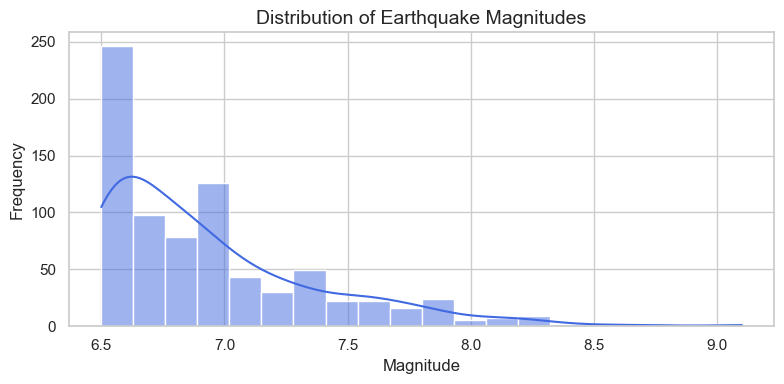

C:\Users\cs911\Downloads\Data Science\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


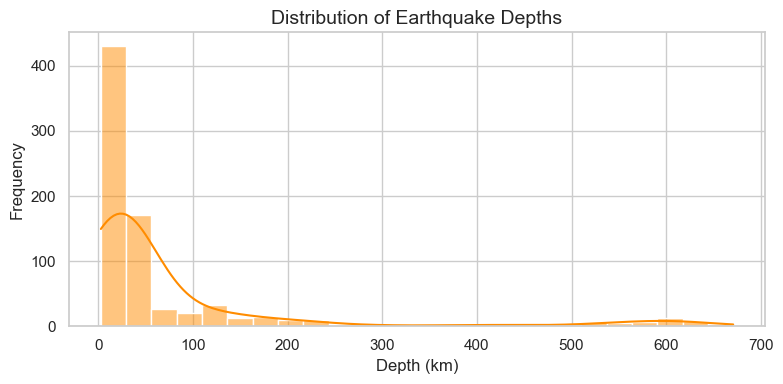

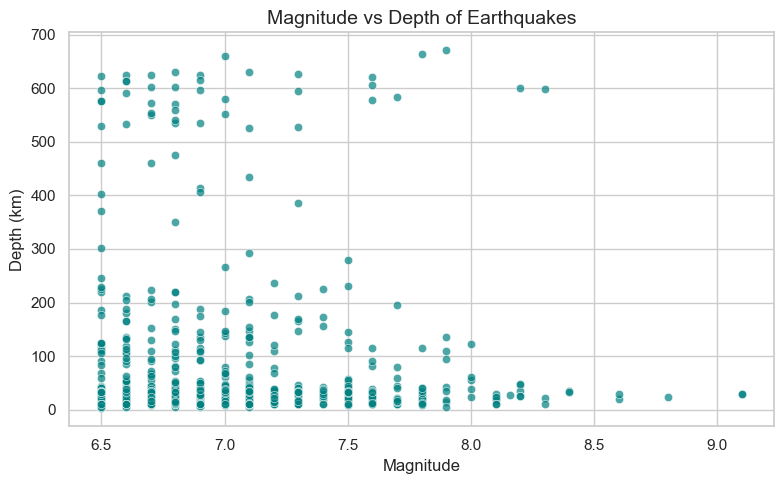

Summary of Magnitude and Depth:
        magnitude       depth
count  782.000000  782.000000
mean     6.941125   75.883199
std      0.445514  137.277078
min      6.500000    2.700000
25%      6.600000   14.000000
50%      6.800000   26.295000
75%      7.100000   49.750000
max      9.100000  670.810000


In [19]:
 #Set plot style
sns.set(style="whitegrid", palette="deep")

# --- 1️ Magnitude Distribution ---
plt.figure(figsize=(8, 4))
sns.histplot(df["magnitude"], bins=20, kde=True, color="royalblue")
plt.title("Distribution of Earthquake Magnitudes", fontsize=14)
plt.xlabel("Magnitude")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# --- 2Depth Distribution ---
plt.figure(figsize=(8, 4))
sns.histplot(df["depth"], bins=25, kde=True, color="darkorange")
plt.title("Distribution of Earthquake Depths", fontsize=14)
plt.xlabel("Depth (km)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# ---  Magnitude vs Depth Relationship ---
plt.figure(figsize=(8, 5))
sns.scatterplot(x="magnitude", y="depth", data=df, alpha=0.7, color="teal")
plt.title("Magnitude vs Depth of Earthquakes", fontsize=14)
plt.xlabel("Magnitude")
plt.ylabel("Depth (km)")
plt.tight_layout()
plt.show()

# ---  Optional: Summary statistics ---
print("Summary of Magnitude and Depth:")
print(df[["magnitude", "depth"]].describe())

* Compare the average magnitude and depth of tsunami vs. non-tsunami events

Average Magnitude & Depth Comparison:

    Event_Type  magnitude      depth
0  Non-Tsunami   6.942803  69.667356
1      Tsunami   6.938487  85.656796


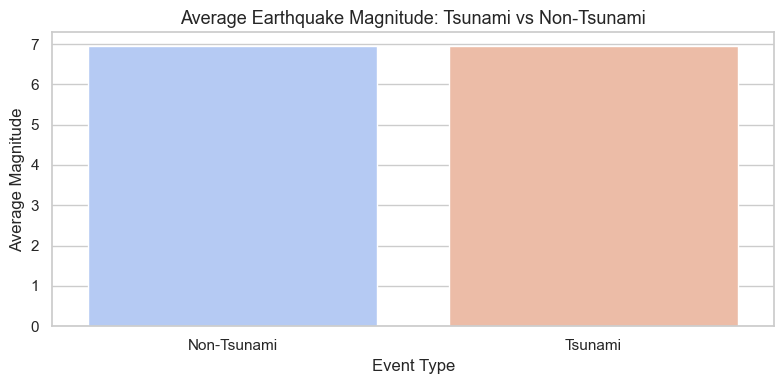

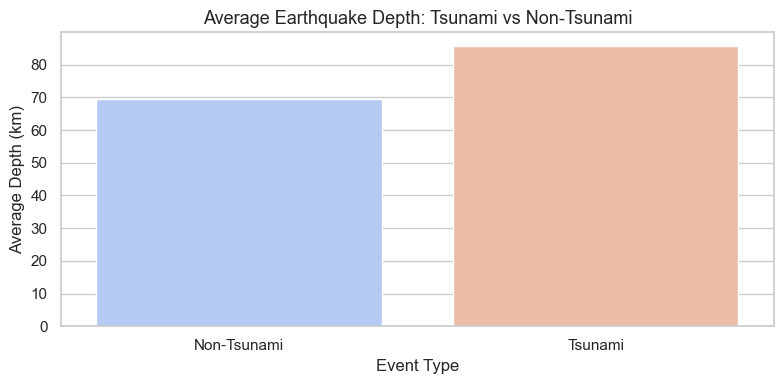

In [20]:

# --- 1️ Calculate averages ---
comparison = df.groupby("tsunami")[["magnitude", "depth"]].mean().reset_index()
comparison["Event_Type"] = comparison["tsunami"].map({0: "Non-Tsunami", 1: "Tsunami"})
print("Average Magnitude & Depth Comparison:\n")
print(comparison[["Event_Type", "magnitude", "depth"]])

# --- 2️ Visualization: Side-by-side bar plots ---
plt.figure(figsize=(8,4))
sns.barplot(x="Event_Type", y="magnitude", data=comparison, palette="coolwarm")
plt.title("Average Earthquake Magnitude: Tsunami vs Non-Tsunami", fontsize=13)
plt.xlabel("Event Type"); plt.ylabel("Average Magnitude")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,4))
sns.barplot(x="Event_Type", y="depth", data=comparison, palette="coolwarm")
plt.title("Average Earthquake Depth: Tsunami vs Non-Tsunami", fontsize=13)
plt.xlabel("Event Type"); plt.ylabel("Average Depth (km)")
plt.tight_layout()
plt.show()

* Highlight major earthquakes (≥8.0) and their characteristics

🔹 Major Earthquakes (Magnitude ≥ 8.0):

     Year  Month  magnitude   depth  latitude  longitude  tsunami
56   2021      8       8.10   22.79  -58.4157   -25.3206        0
59   2021      7       8.20   46.66   55.4742  -157.9170        1
60   2021      7       8.20   35.00   55.3154  -157.8290        1
74   2021      3       8.10   28.93  -29.7466  -177.2240        1
129  2019      5       8.00  122.57   -5.8119   -75.2697        1
170  2018      8       8.20  600.00  -18.1125  -178.1530        1
198  2017      9       8.20   47.39   15.0222   -93.8993        1
285  2015      9       8.30   22.44  -31.5729   -71.6744        1
356  2014      4       8.20   25.00  -19.6097   -70.7691        1
393  2013      5       8.30  598.10   54.8920   153.2210        1
414  2013      2       8.00   24.00  -10.7990   165.1140        1
440  2012      4       8.20   25.10    0.8020    92.4630        0
441  2012      4       8.60   20.00    2.3270    93.0630        0
476  2011      3       9.10   29.00 

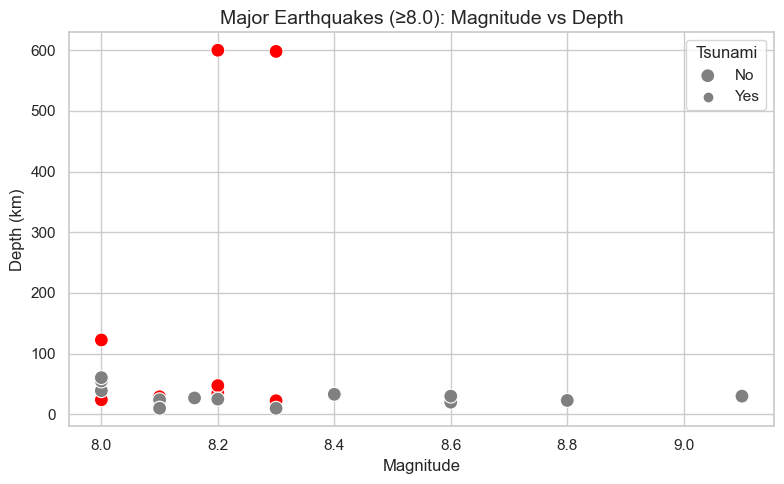

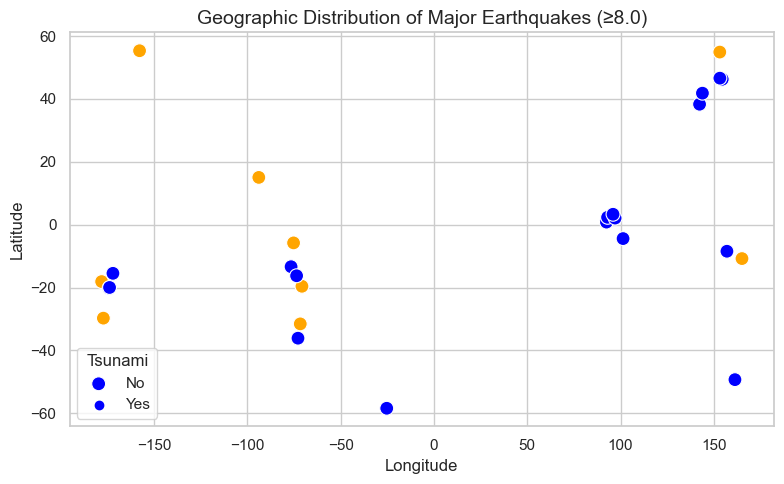

In [21]:

# --- 1️ Filter major earthquakes ---
major_eq = df[df["magnitude"] >= 8.0]

# --- 2️ Display their key characteristics ---
print("🔹 Major Earthquakes (Magnitude ≥ 8.0):\n")
print(major_eq[["Year", "Month", "magnitude", "depth", "latitude", "longitude", "tsunami"]])

# --- 3️ Summary statistics ---
summary = major_eq[["magnitude", "depth", "tsunami"]].describe()
print("\n📊 Summary Statistics for Major Earthquakes:\n")
print(summary)

# --- 4️ Count of major earthquakes per year ---
major_count = major_eq.groupby("Year").size().reset_index(name="Count")
print("\n🕒 Major Earthquake Frequency by Year:\n")
print(major_count)

# --- 5️ Visualization: Magnitude vs Depth (highlight tsunami events) ---
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=major_eq,
    x="magnitude",
    y="depth",
    hue="tsunami",
    palette={0: "gray", 1: "red"},
    s=100
)
plt.title("Major Earthquakes (≥8.0): Magnitude vs Depth", fontsize=14)
plt.xlabel("Magnitude")
plt.ylabel("Depth (km)")
plt.legend(title="Tsunami", labels=["No", "Yes"])
plt.tight_layout()
plt.show()

# --- 6️ Optional: Map distribution (latitude vs longitude) ---
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=major_eq,
    x="longitude",
    y="latitude",
    hue="tsunami",
    palette={0: "blue", 1: "orange"},
    s=100
)
plt.title("Geographic Distribution of Major Earthquakes (≥8.0)", fontsize=14)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Tsunami", labels=["No", "Yes"])
plt.tight_layout()
plt.show()

# 3. Geographic Distribution Using 2D Plotting

* Plot earthquake locations using latitude and longitude on a 2D scatter plot.

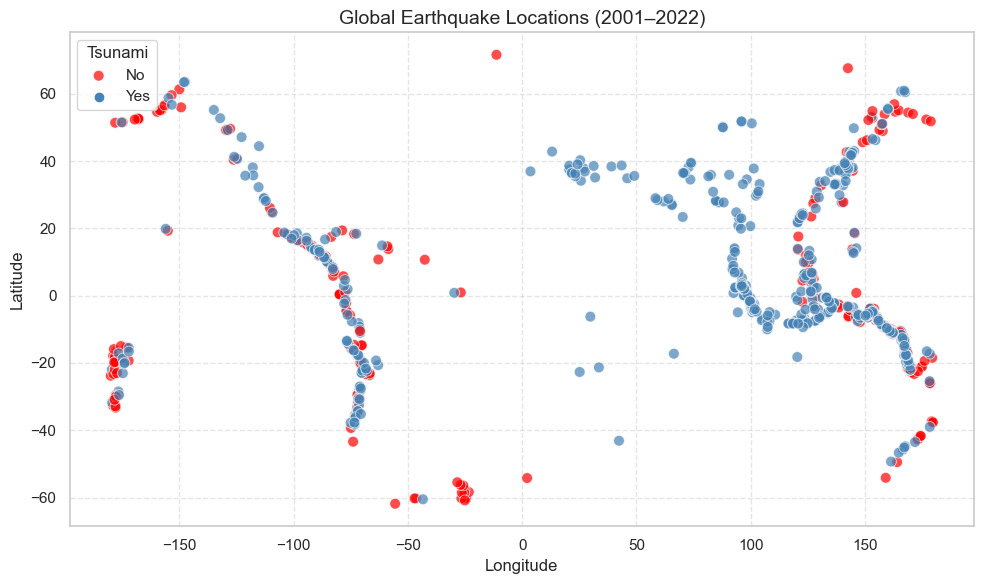

In [22]:

# --- 1️ Create scatter plot of locations ---
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x="longitude",
    y="latitude",
    hue="tsunami",
    palette={0: "steelblue", 1: "red"},
    alpha=0.7,
    s=60
)

# --- 2️ Customize plot ---
plt.title("Global Earthquake Locations (2001–2022)", fontsize=14)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Tsunami", labels=["No", "Yes"])
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

* Visually distinguish between tsunami and non-tsunami events.

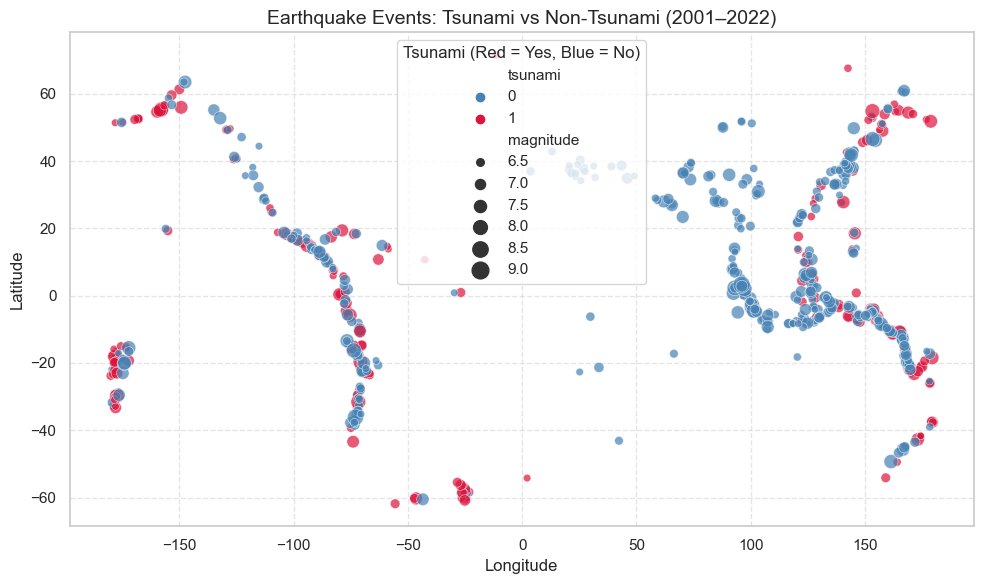

In [23]:

# --- 1️ Create scatter plot ---
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x="longitude",
    y="latitude",
    hue="tsunami",            # Color by tsunami (0=No, 1=Yes)
    size="magnitude",         # Size by magnitude
    palette={0: "steelblue", 1: "crimson"},
    sizes=(30, 150),
    alpha=0.7
)

# --- 2️ Customize plot ---
plt.title("Earthquake Events: Tsunami vs Non-Tsunami (2001–2022)", fontsize=14)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Tsunami (Red = Yes, Blue = No)", loc="best")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

* Identify clusters or regions with higher concentration of tsunami events (without using map tiles or interactive maps).

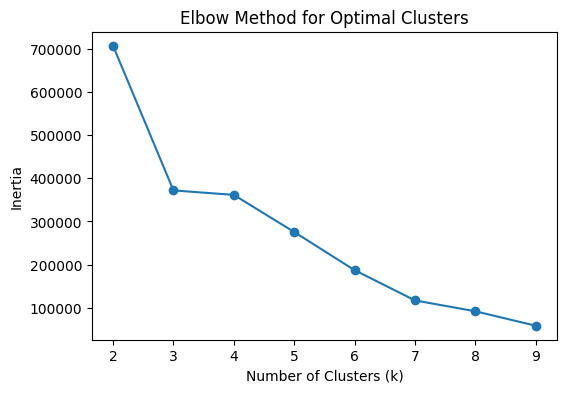

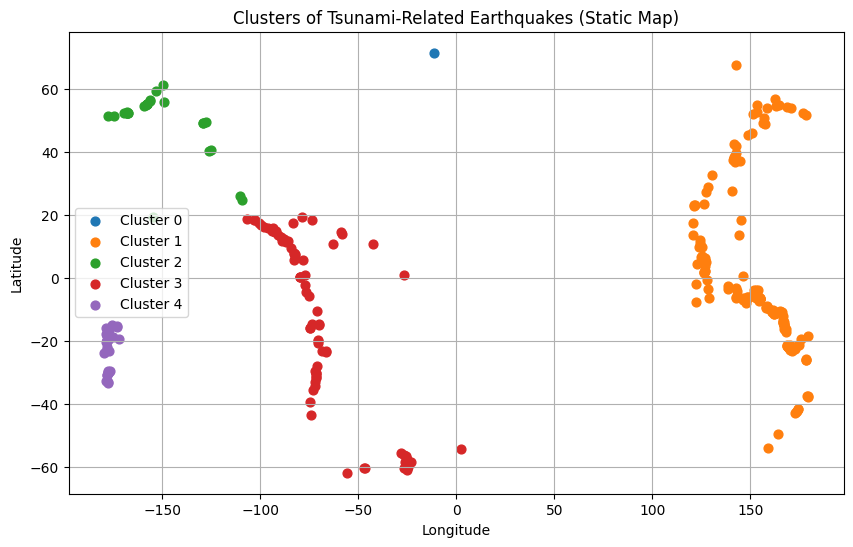


Cluster Centers (Approximate Tsunami Hotspots):
    latitude   longitude  cluster_id
0  71.631200  -11.243100           0
1   1.137839  152.858421           1
2  49.690118 -152.046786           2
3 -12.960683  -69.486528           3
4 -23.389767 -177.395600           4


In [4]:
from sklearn.cluster import KMeans
# Filter only tsunami events
tsunami_data = df[df['tsunami'] == 1].copy()

# Select coordinates for clustering
coords = tsunami_data[['latitude', 'longitude']]

# Determine optimal number of clusters (optional — simple elbow method)
inertia = []
K = range(2, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(coords)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(K, inertia, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()

# Choose number of clusters (e.g., k=5)
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
tsunami_data['cluster'] = kmeans.fit_predict(coords)

# Plot clusters
plt.figure(figsize=(10, 6))
for cluster_id in range(k):
    cluster_points = tsunami_data[tsunami_data['cluster'] == cluster_id]
    plt.scatter(cluster_points['longitude'], cluster_points['latitude'], label=f'Cluster {cluster_id}', s=40)

plt.title("Clusters of Tsunami-Related Earthquakes (Static Map)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.grid(True)
plt.show()

# Convert cluster centers into DataFrame
cluster_centers_df = pd.DataFrame(kmeans.cluster_centers_, columns=['latitude', 'longitude'])
cluster_centers_df['cluster_id'] = cluster_centers_df.index

# Display as DataFrame
print("\nCluster Centers (Approximate Tsunami Hotspots):")
print(cluster_centers_df)

# Optional: Save to CSV
cluster_centers_df.to_csv("tsunami_cluster_centers.csv", index=False)

# 4 
Statistical and Comparative Analyss
:

* Use box plots, histograms, and bar charts to compare seismic features between tsunami and non-tsunami events.

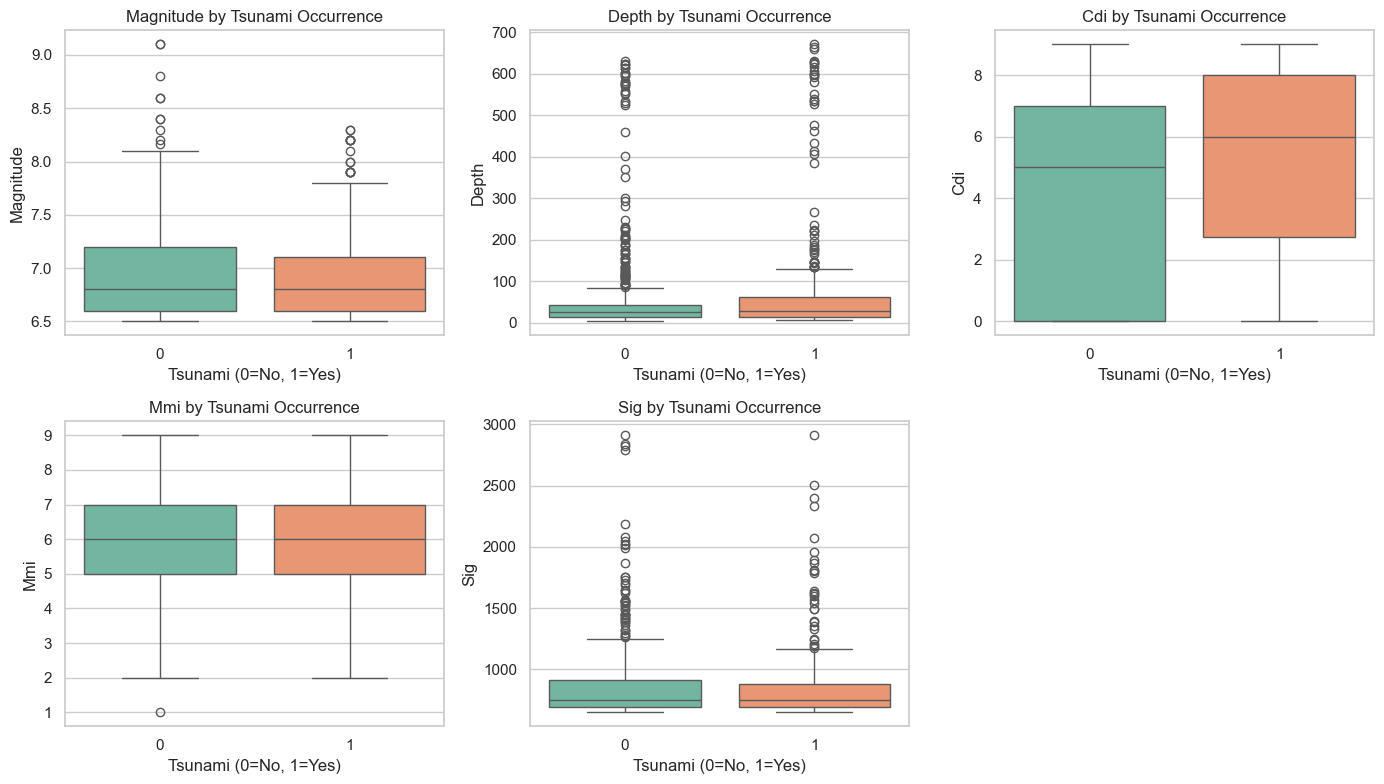

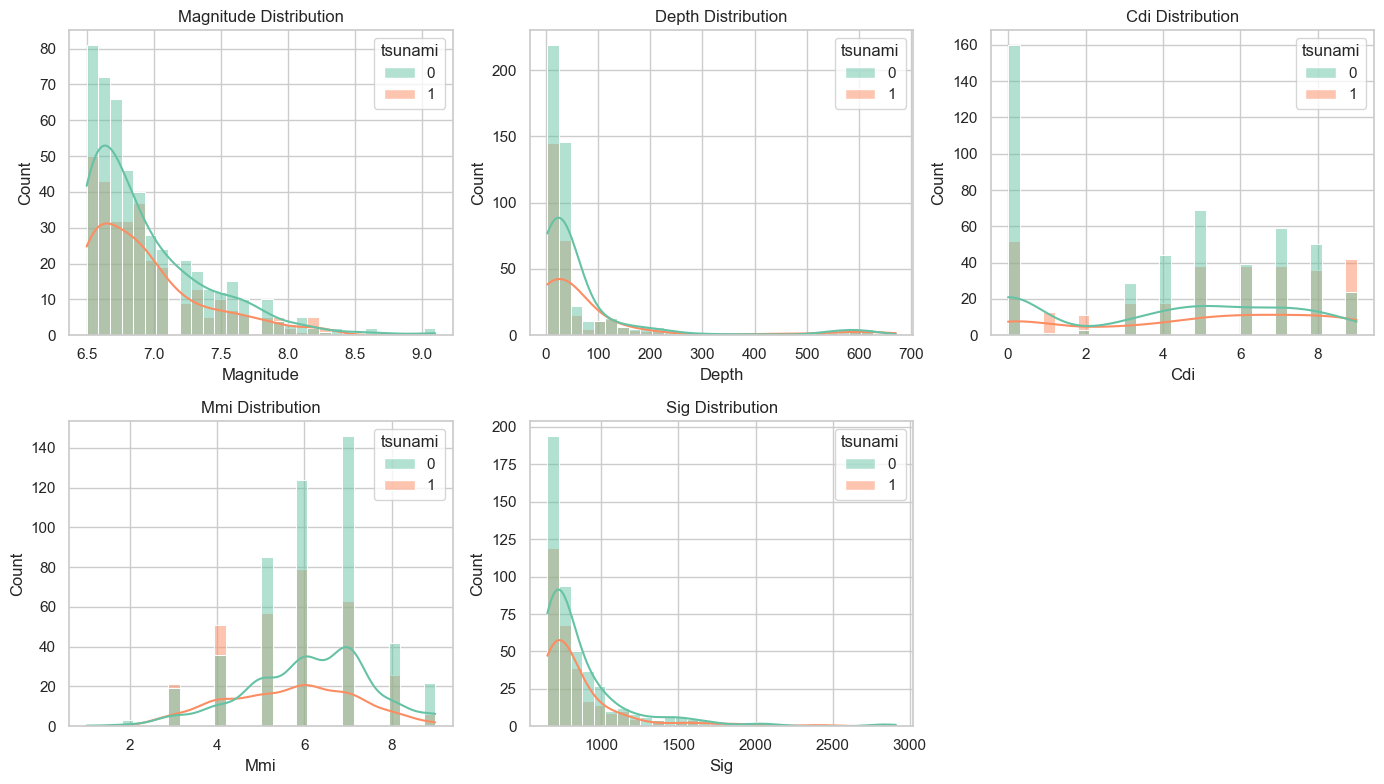

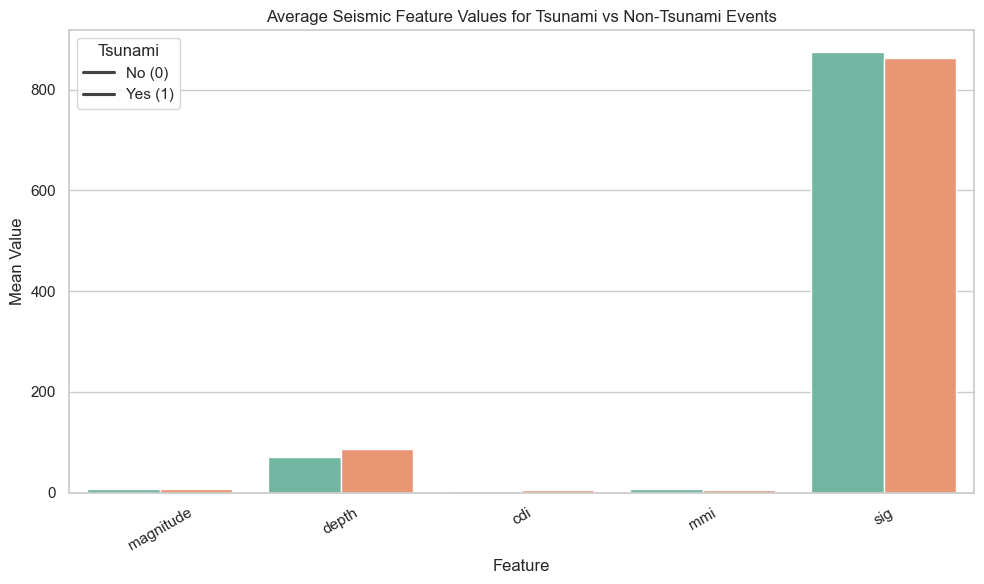


Statistical Summary of Seismic Features by Tsunami Occurrence:
tsunami                    0            1
magnitude count   478.000000   304.000000
          mean      6.942803     6.938487
          std       0.459541     0.423250
          min       6.500000     6.500000
          25%       6.600000     6.600000
          50%       6.800000     6.800000
          75%       7.200000     7.100000
          max       9.100000     8.300000
depth     count   478.000000   304.000000
          mean     69.667356    85.656796
          std     127.501206   151.080342
          min       2.700000     5.000000
          25%      14.250000    13.807500
          50%      26.000000    26.971500
          75%      42.450000    61.147500
          max     630.000000   670.810000
cdi       count   478.000000   304.000000
          mean      3.928870     4.970395
          std       3.160149     3.084473
          min       0.000000     0.000000
          25%       0.000000     2.750000
          50

In [17]:


df['tsunami'] = df['tsunami'].astype(int)

sns.set(style="whitegrid", palette="Set2")

features = ['magnitude', 'depth', 'cdi', 'mmi', 'sig']
features = [f for f in features if f in df.columns]  # only available columns

plt.figure(figsize=(14, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='tsunami', y=feature, data=df, hue='tsunami', legend=False)
    plt.title(f'{feature.capitalize()} by Tsunami Occurrence')
    plt.xlabel('Tsunami (0=No, 1=Yes)')
    plt.ylabel(feature.capitalize())

plt.tight_layout()
plt.show()



plt.figure(figsize=(14, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=df, x=feature, hue='tsunami', bins=30, kde=True)
    plt.title(f'{feature.capitalize()} Distribution')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


mean_values = df.groupby('tsunami')[features].mean().reset_index()
mean_values_melted = mean_values.melt(id_vars='tsunami', var_name='Feature', value_name='Mean Value')

plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='Mean Value', hue='tsunami', data=mean_values_melted)
plt.title("Average Seismic Feature Values for Tsunami vs Non-Tsunami Events")
plt.xlabel("Feature")
plt.ylabel("Mean Value")
plt.legend(title='Tsunami', labels=['No (0)', 'Yes (1)'])
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


summary = df.groupby('tsunami')[features].describe().T
print("\nStatistical Summary of Seismic Features by Tsunami Occurrence:")
print(summary)


* Analyze correlations between variables using heatmaps.

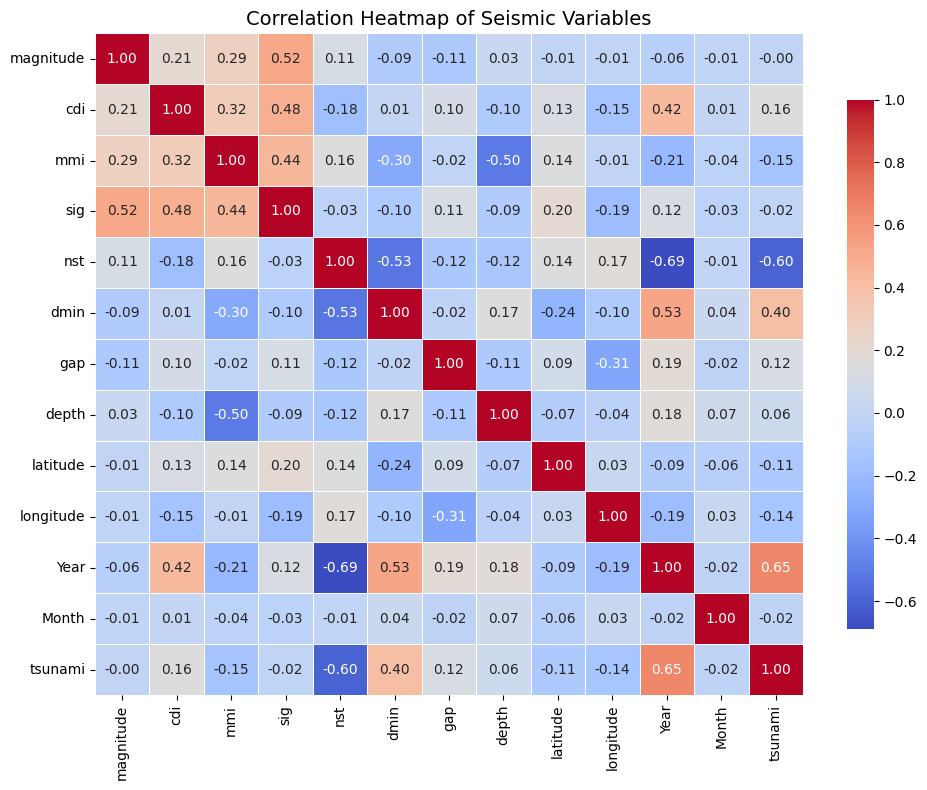

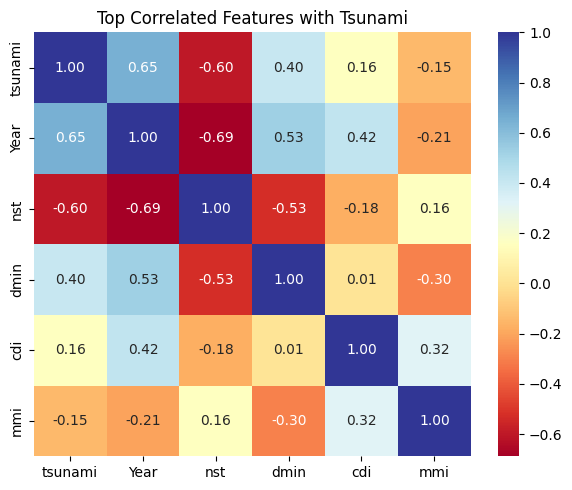

In [6]:
df.columns = df.columns.map(str)
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,         
    fmt=".2f",
    cmap="coolwarm",     
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Heatmap of Seismic Variables", fontsize=14)
plt.tight_layout()
plt.show()
top_corr_features = corr_matrix['tsunami'].abs().sort_values(ascending=False).head(6).index
plt.figure(figsize=(6, 5))
sns.heatmap(
    corr_matrix.loc[top_corr_features, top_corr_features],
    annot=True,
    cmap="RdYlBu",
    fmt=".2f"
)
plt.title("Top Correlated Features with Tsunami")
plt.tight_layout()
plt.show()

# 5.
Insights and Observations:

* Summarize key differences in seismic behavior between tsunami and non-tsunami earthquakes.

In [33]:
from scipy.stats import ttest_ind
# Separate tsunami and non-tsunami groups
tsunami = df[df['tsunami'] == 1]
non_tsunami = df[df['tsunami'] == 0]

# Features to compare
features = ['magnitude', 'depth', 'cdi', 'mmi', 'sig', 'nst', 'dmin', 'gap']

# Initialize results list
results = []

# Compare each feature
for feature in features:
    t_stat, p_val = ttest_ind(tsunami[feature], non_tsunami[feature], equal_var=False)
    mean_tsunami = tsunami[feature].mean()
    mean_non = non_tsunami[feature].mean()
    diff = mean_tsunami - mean_non
    
    results.append({
        'Feature': feature,
        'Mean (Tsunami)': round(mean_tsunami, 3),
        'Mean (Non-Tsunami)': round(mean_non, 3),
        'Difference': round(diff, 3),
        'T-Statistic': round(t_stat, 3),
        'P-Value': round(p_val, 5)
    })

# Create summary DataFrame
summary_df = pd.DataFrame(results)

# Add significance interpretation
summary_df['Significance'] = summary_df['P-Value'].apply(
    lambda p: 'Significant' if p < 0.05 else 'Not Significant'
)

# Display the results
print("\n🔍 Key Differences in Seismic Behavior (Tsunami vs Non-Tsunami):")
print(summary_df)

# Optional: Save summary to CSV
summary_df.to_csv("seismic_tsunami_differences.csv", index=False)


🔍 Key Differences in Seismic Behavior (Tsunami vs Non-Tsunami):
     Feature  Mean (Tsunami)  Mean (Non-Tsunami)  Difference  T-Statistic  \
0  magnitude           6.938               6.943      -0.004       -0.134   
1      depth          85.657              69.667      15.989        1.531   
2        cdi           4.970               3.929       1.042        4.559   
3        mmi           5.694               6.136      -0.442       -4.133   
4        sig         863.845             874.092     -10.247       -0.435   
5        nst          42.066             349.933    -307.867      -23.725   
6       dmin           2.440               0.617       1.823       11.377   
7        gap          28.571              22.792       5.779        3.058   

   P-Value     Significance  
0  0.89310  Not Significant  
1  0.12636  Not Significant  
2  0.00001      Significant  
3  0.00004      Significant  
4  0.66379  Not Significant  
5  0.00000      Significant  
6  0.00000      Significant  
7

* Identify seismic thresholds or indicators associated with increased tsunami potential.


🔍 Classification Report for Tsunami Prediction:

              precision    recall  f1-score   support

           0       0.91      0.74      0.82       144
           1       0.68      0.88      0.77        91

    accuracy                           0.80       235
   macro avg       0.80      0.81      0.79       235
weighted avg       0.82      0.80      0.80       235


🌊 Top Seismic Indicators for Tsunami Potential:
     Feature  Coefficient  Importance
5        nst    -1.924049    1.924049
0  magnitude     0.364289    0.364289
3        cdi     0.316569    0.316569
2        sig    -0.298809    0.298809
4        mmi    -0.221032    0.221032
6       dmin     0.212388    0.212388
7        gap     0.184095    0.184095
1      depth    -0.163597    0.163597

📈 Approximate Seismic Thresholds Associated with Tsunami Events:
           Non-Tsunami Mean  Tsunami Mean  Difference
depth             69.667356     85.656796   15.989440
gap               22.792448     28.571382    5.778934
dmin

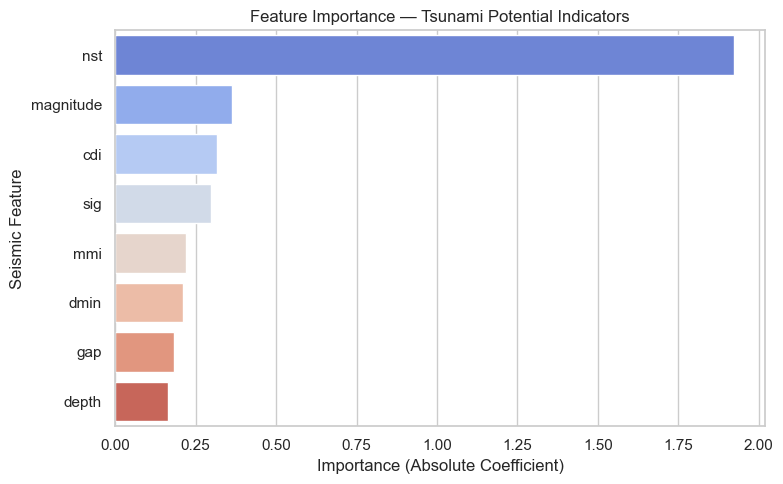

In [35]:
# Import libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


# Drop missing values for model training
df = df.dropna(subset=['magnitude', 'depth', 'sig', 'cdi', 'mmi'])

# Select features that may influence tsunami generation
features = ['magnitude', 'depth', 'sig', 'cdi', 'mmi', 'nst', 'dmin', 'gap']
X = df[features]
y = df['tsunami']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression model
model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
model.fit(X_train_scaled, y_train)

# Model evaluation
y_pred = model.predict(X_test_scaled)
print("\n🔍 Classification Report for Tsunami Prediction:\n")
print(classification_report(y_test, y_pred))

# Extract feature importance (coefficients)
importance = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_[0],
    'Importance': np.abs(model.coef_[0])
}).sort_values(by='Importance', ascending=False)

print("\n🌊 Top Seismic Indicators for Tsunami Potential:")
print(importance)

# Estimate indicative threshold (approx mean value for tsunami vs non-tsunami)
thresholds = df.groupby('tsunami')[features].mean().T
thresholds.columns = ['Non-Tsunami Mean', 'Tsunami Mean']
thresholds['Difference'] = thresholds['Tsunami Mean'] - thresholds['Non-Tsunami Mean']

print("\n📈 Approximate Seismic Thresholds Associated with Tsunami Events:")
print(thresholds.sort_values(by='Difference', ascending=False))

# Visualize feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=importance, palette='coolwarm')
plt.title("Feature Importance — Tsunami Potential Indicators")
plt.xlabel("Importance (Absolute Coefficient)")
plt.ylabel("Seismic Feature")
plt.tight_layout()
plt.show()
